<a href="https://colab.research.google.com/github/mohmaed7777/Fish_marketpalce/blob/main/Fish_Marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Content:**


This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

**Acknowledgements:**


Thanks to all who make Kernels using this dataset and also people viewed or download this data.

**Inspiration:**


**Multiple linear regression** is a fundamental practice for this dataset. Multivariate analysis can also be performed.

In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
sns.set()
%matplotlib inline 
%pylab inline 
%config InlineBackend.figure_formats=['retina']
print("Setup Complete^___^")

Populating the interactive namespace from numpy and matplotlib
Setup Complete^___^


In [81]:
file_path = '/content/Fish.csv'
df = pd.read_csv(file_path)


In [82]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [84]:
# Check the missing values : 
missing_data = df.isnull().sum()
missing_data[:]

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

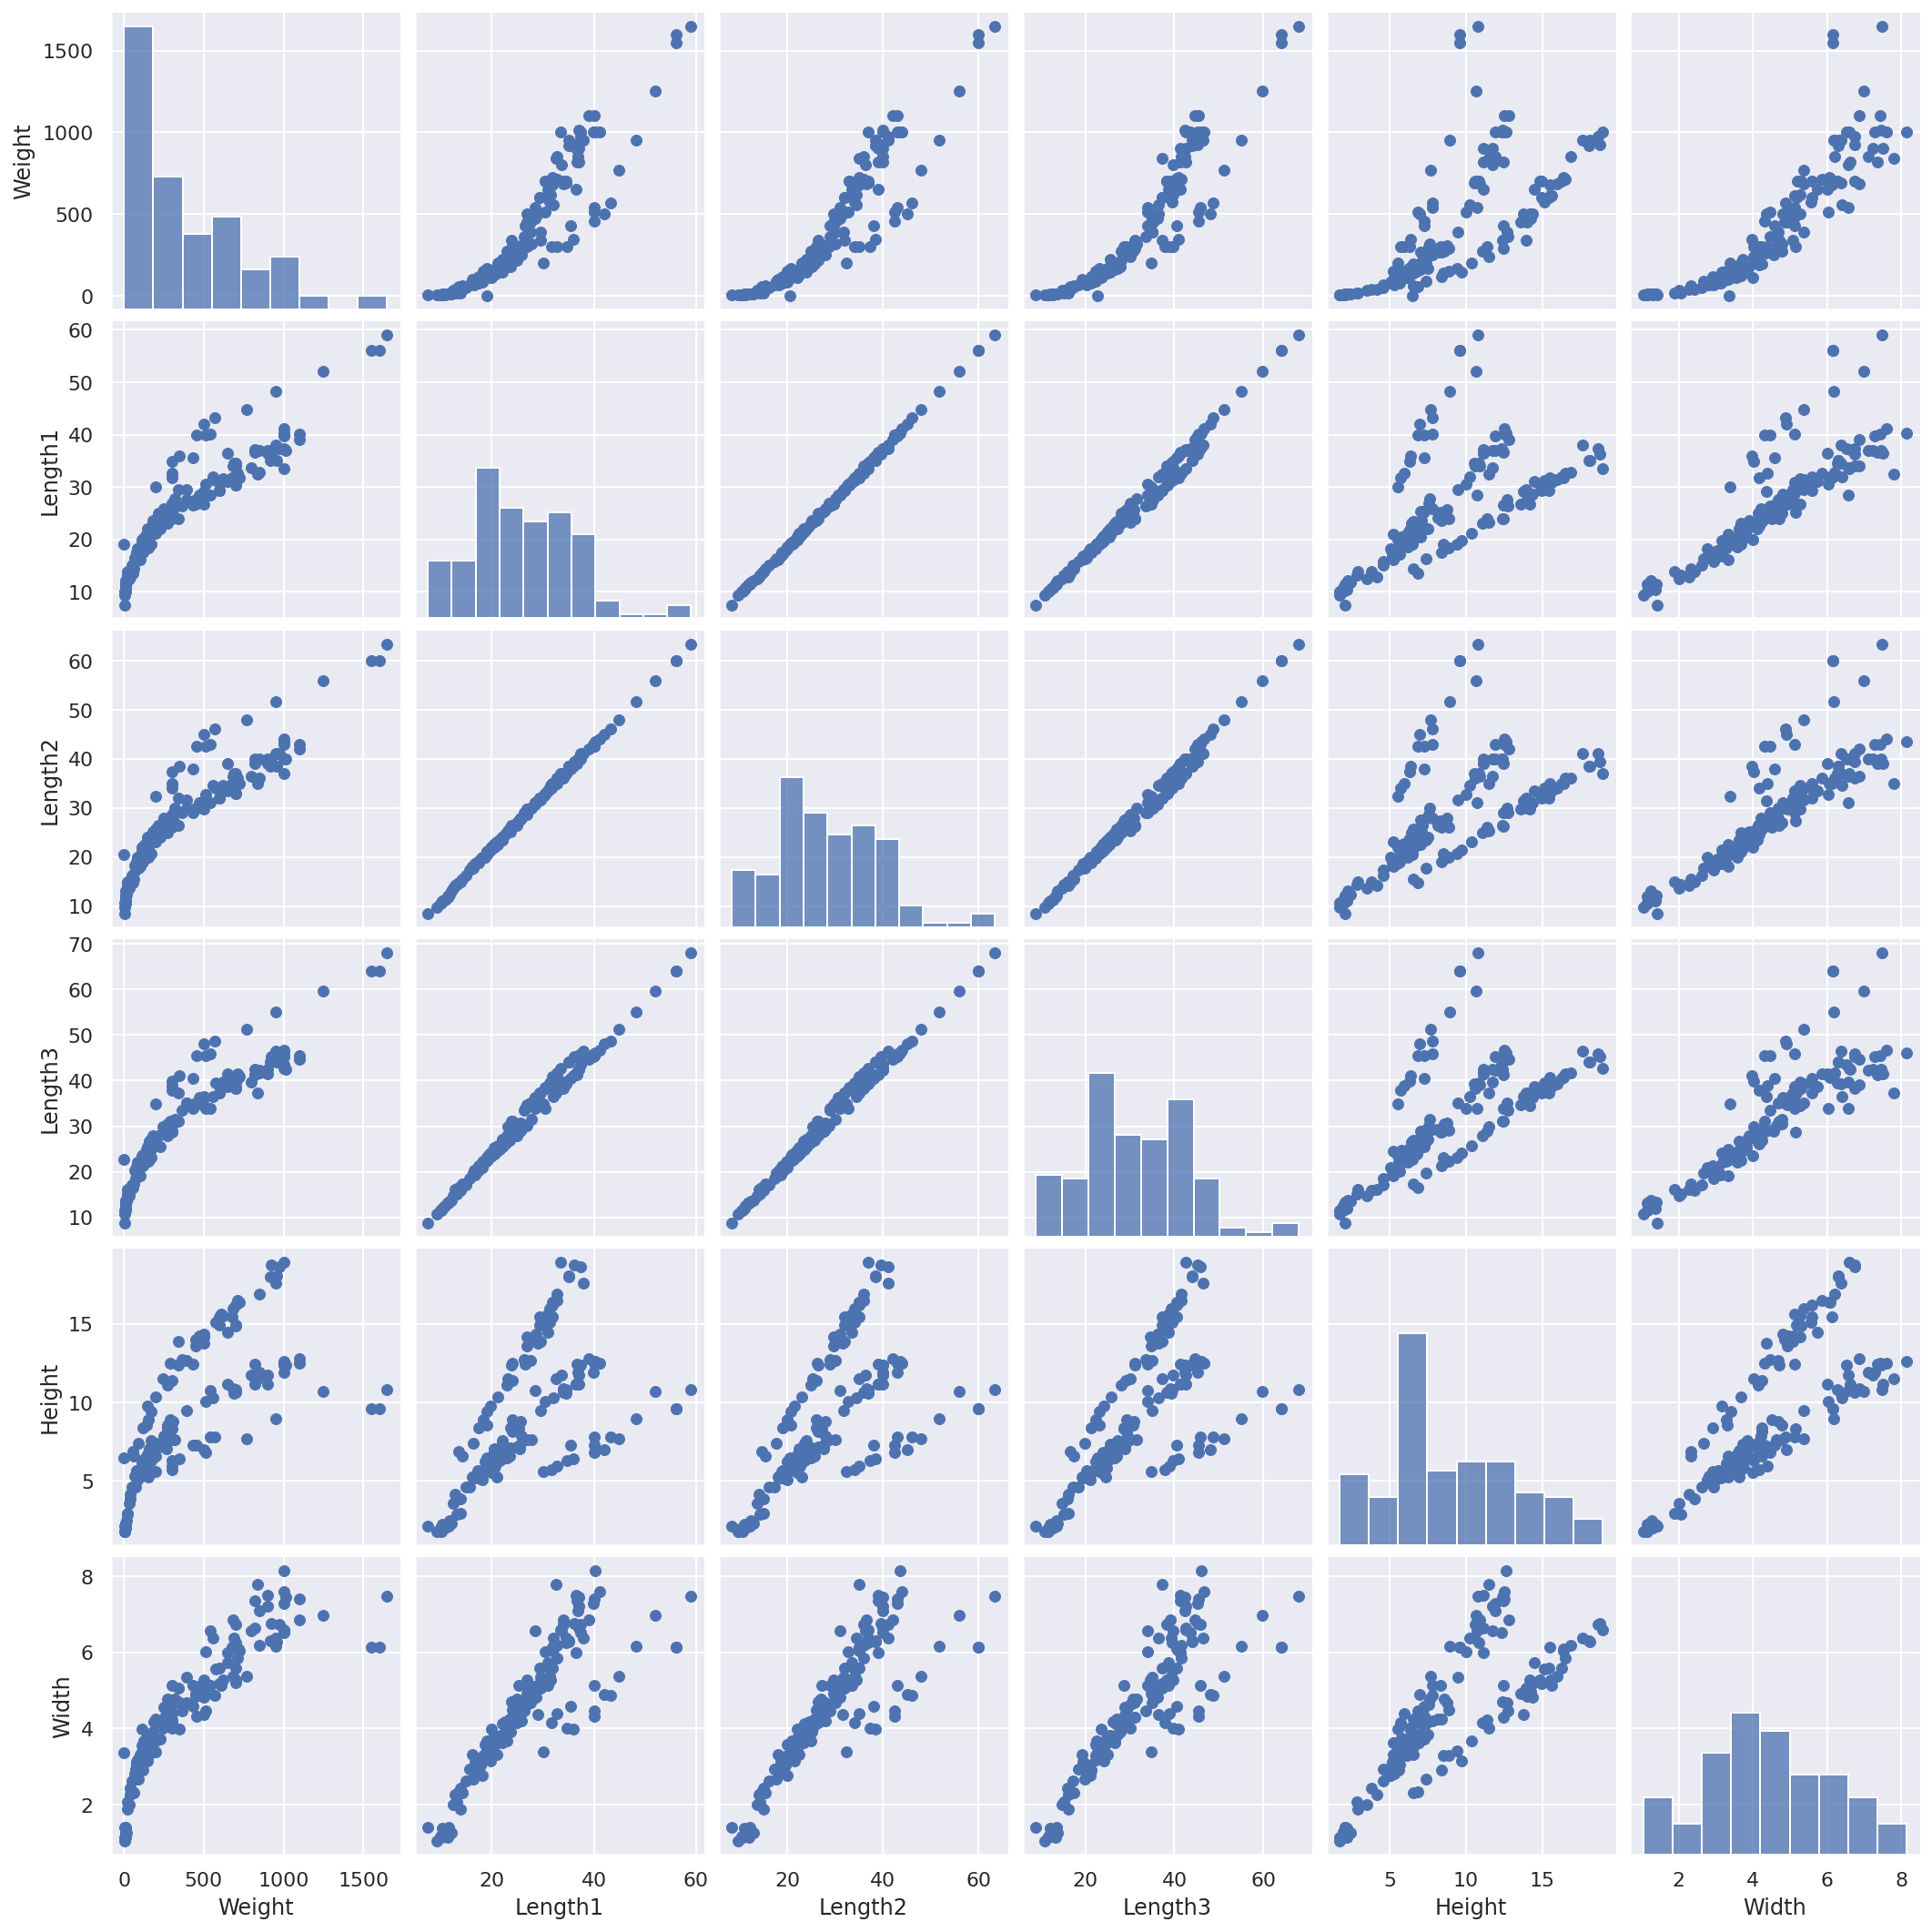

In [85]:
# Take a look at the Linear Realtionship among all Features : 
sns.pairplot(df, plot_kws=dict(alpha=1, edgecolor=None))

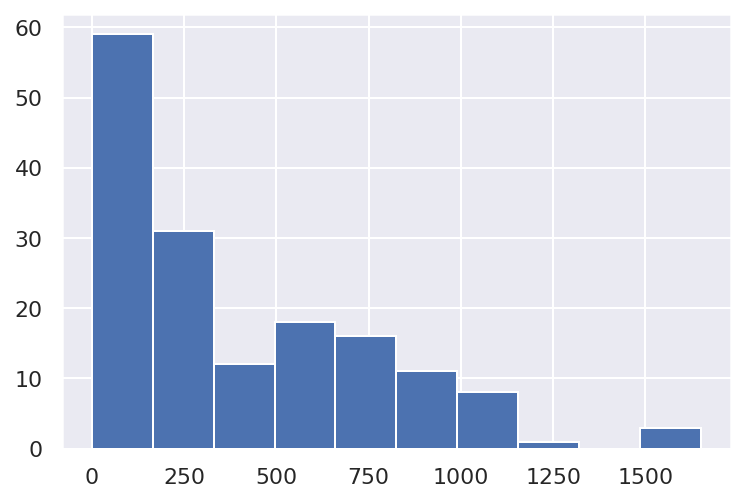

In [86]:
# Make our traget value (Weight) Normally Distrubited : 
# Plotting a histogram :  
df.Weight.hist();

In [87]:
from scipy.stats.mstats import normaltest
# This test outputs "p value" and must be less than 0.05 for normally distributed data : 
normaltest(df.Weight.values)

NormaltestResult(statistic=27.886479033489827, pvalue=8.800918879987917e-07)

In [88]:
# Our target value (Weight) seems not normally destributed and that mean we need to do : 
#1/ Log Transformation 2/ Sqaure root 3/ boxcox 
log_weigth = np.log(df.Weight)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
log_weigth

0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 159, dtype: float64

In [90]:
# Log Transformation : 
# Create alist of float columns to check the skewing : 
num_cols = df.select_dtypes('number').columns
skew_limit = 0.75 
skew_vals = df[num_cols].skew()
# Showing the skewed columns : 
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

Weight    1.10445
dtype: float64

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Value'),
 Text(0.5, 1.0, 'after np.log1p')]

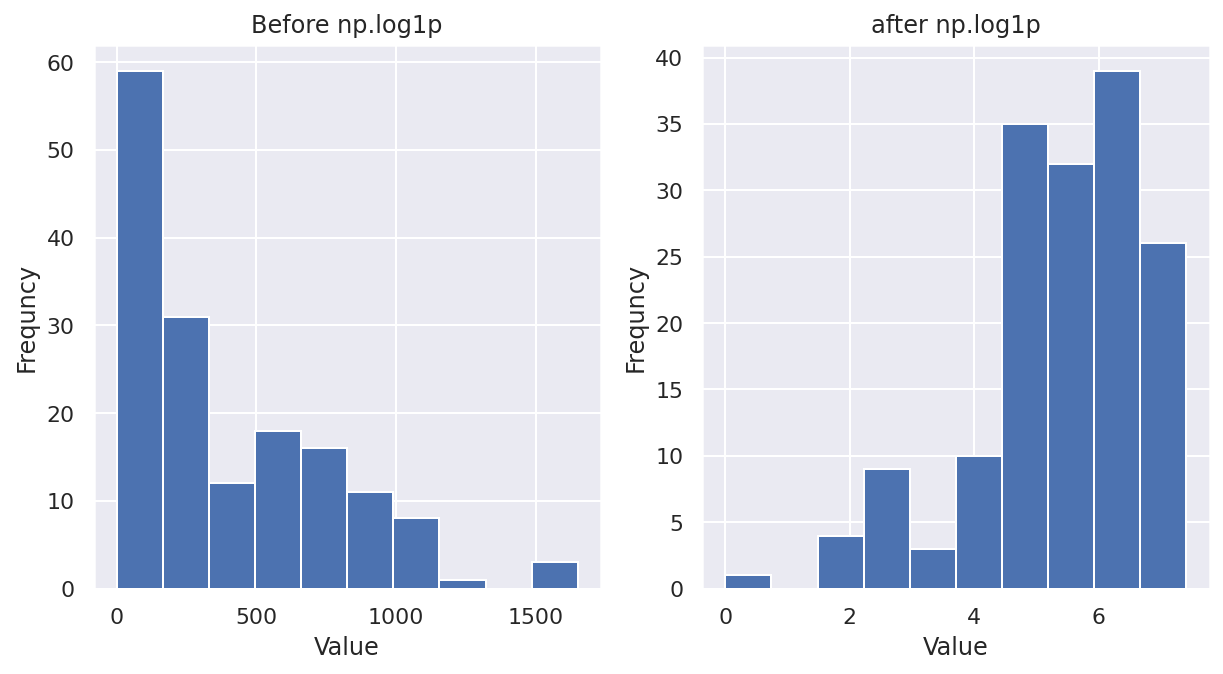

In [91]:

# Lets look at what happens to one of these features, when we apply np.log1p visually : 
# choose the filed: 
field = 'Weight'
# Create two subplots & a figure using matplotlib : 
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(10,5))
# Create a histogram on the "ax_before" subplot
df[field].hist(ax = ax_before)
# Apply a log transformation (numpy syntax) to this column:
df[field].apply(np.log1p).hist(ax = ax_after)
# Formatting the titles : 
ax_before.set(title='Before np.log1p',
              ylabel='Frequncy',
              xlabel='Value')
ax_after.set(title='after np.log1p',
              ylabel='Frequncy',
              xlabel='Value')

In [92]:
# Perform the Skew transformation : 
for col in skew_cols.index.values:
  if col == "Weight":
    continue
  df[col] = df[col].apply(np.log1p)  

#**Linear Regression Analysis:**

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

**Cross_Validation & Train test Split:-**

In [94]:
 # We Need to Know the number of Srings / intgers and Float that we have in our dataframe : 
 df.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [95]:
# Select the Object column : 
mask = df.dtypes == np.object
mask

Species     True
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [96]:
categorical_cols = df.columns[mask]

In [97]:
# Check the categorical_cols: 
categorical_cols[:]

Index(['Species'], dtype='object')

In [98]:
# Determaine how many extra columns would be created : 
num_ohc_cols = df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

In [99]:
num_ohc_cols

Species    7
dtype: int64

In [100]:
# no need to encodeif there is only one value: 
small_num_ohc_col = num_ohc_cols.loc[num_ohc_cols > 1 ]

In [101]:
small_num_ohc_col.sum()

7

In [102]:
# Create a new dataFrame where all the Categorical Features will be One-hot-encoded : 
from sklearn.preprocessing import OneHotEncoder

In [103]:
# Copy all the data :
data_ohc = df.copy

In [104]:
data_ohc

<bound method NDFrame.copy of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [105]:
# Create one hot encoder object : 
ohc = OneHotEncoder()

In [108]:
for col in num_ohc_cols.index:
  # onehotencode the data--this returns a spare array
  new_dat = ohc.fit_transform(data_ohc[col])
  # drop the original column from the dataframe:
  data_ohc = data_ohc.drop(col, axis=1)
  # Get the names of all unique values in the column:
  cats = ohc.categories_
  # create column names for each OHC column by value: 
  new_cols = ['_'.join([col, cat]) for cat in cats[0]]
  #create a new datafream:
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  # Append the new_data to the DataFream: 
  data_ohc = pd.concat([data_ohc, new_df], axis=1)


TypeError: ignored

In [79]:
# Columns diffrences is as calculated above : 
data_ohc.shape[1] - df.shape[1]

AttributeError: ignored